# Importing Necessary Libraries

In [1]:
#Importing libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from patsy import dmatrices
from sklearn import metrics
import statsmodels.api as sm

In [2]:
#Read Data
dta = sm.datasets.fair.load_pandas().data

In [3]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
#check any null value present or not
dta.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

In [5]:
#uderstanding the datatype
dta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
rate_marriage      6366 non-null float64
age                6366 non-null float64
yrs_married        6366 non-null float64
children           6366 non-null float64
religious          6366 non-null float64
educ               6366 non-null float64
occupation         6366 non-null float64
occupation_husb    6366 non-null float64
affairs            6366 non-null float64
dtypes: float64(9)
memory usage: 447.7 KB


In [6]:
#Converting Affairs into categorical
#add "affair" column: 1 represents having affairs, 0 represents not
dta['affairs'] = (dta['affairs']>0).astype(int)
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


In [7]:
dta.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [8]:
#data description
dta.describe(include='all')

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


rate_marriage  1.0  2.0  3.0   4.0   5.0
affairs                                 
0               25  127  446  1518  2197
1               74  221  547   724   487


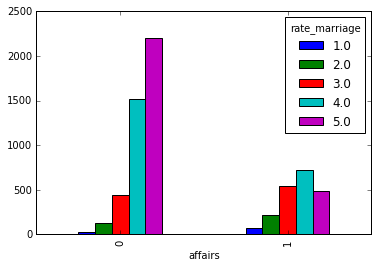

In [9]:
#cross-tabulation of data
print(pd.crosstab(dta['affairs'],dta['rate_marriage'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['rate_marriage'],rownames=['affairs']).plot(kind='bar')

age      17.5  22.0  27.0  32.0  37.0  42.0
affairs                                    
0         126  1394  1298   644   364   487
1          13   406   633   425   270   306


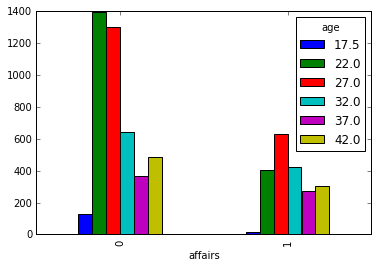

In [10]:
print(pd.crosstab(dta['affairs'],dta['age'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['age'],rownames=['affairs']).plot(kind='bar')

yrs_married  0.5   2.5   6.0   9.0   13.0  16.5  23.0
affairs                                              
0             354  1595   754   348   347   449   466
1              16   439   387   254   243   369   345


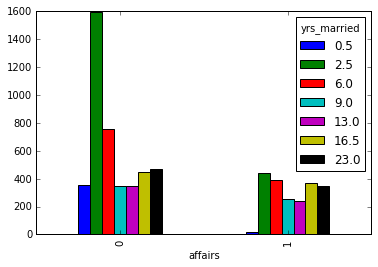

In [11]:
print(pd.crosstab(dta['affairs'],dta['yrs_married'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['yrs_married'],rownames=['affairs']).plot(kind='bar')

children   0.0  1.0  2.0  3.0  4.0  5.5
affairs                                
0         1912  747  873  460  197  124
1          502  412  608  321  131   79


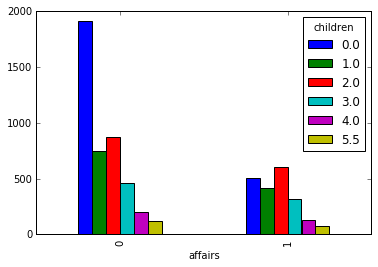

In [12]:
print(pd.crosstab(dta['affairs'],dta['children'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['children'],rownames=['affairs']).plot(kind='bar')

religious  1.0   2.0   3.0  4.0
affairs                        
0          613  1448  1715  537
1          408   819   707  119


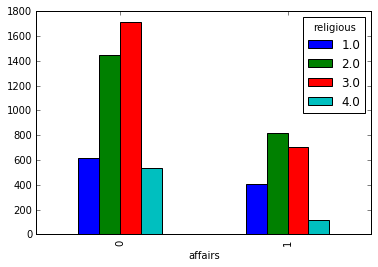

In [13]:
print(pd.crosstab(dta['affairs'],dta['religious'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['religious'],rownames=['affairs']).plot(kind='bar')

educ     9.0   12.0  14.0  16.0  17.0  20.0
affairs                                    
0          27  1361  1469   844   370   242
1          21   723   808   273   140    88


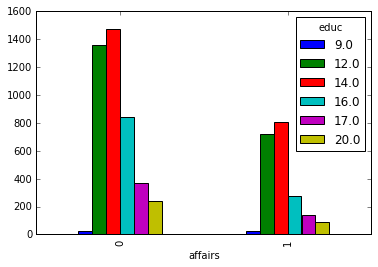

In [14]:
print(pd.crosstab(dta['affairs'],dta['educ'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['educ'],rownames=['affairs']).plot(kind='bar')

occupation  1.0  2.0   3.0   4.0  5.0  6.0
affairs                                   
0            34  607  1818  1354  431   69
1             7  252   965   480  309   40


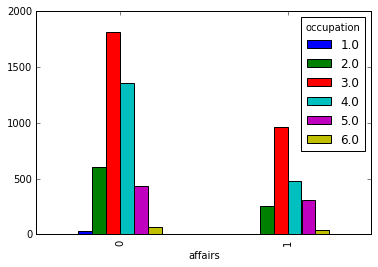

In [15]:
print(pd.crosstab(dta['affairs'],dta['occupation'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['occupation'],rownames=['affairs']).plot(kind='bar')

occupation_husb  1.0  2.0  3.0   4.0   5.0  6.0
affairs                                        
0                181  882  317  1391  1177  365
1                 48  426  173   639   602  165


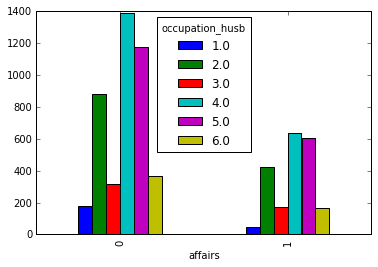

In [16]:
print(pd.crosstab(dta['affairs'],dta['occupation_husb'],rownames=['affairs']))
pd.crosstab(dta['affairs'],dta['occupation_husb'],rownames=['affairs']).plot(kind='bar')

In [17]:
dta.groupby('affairs').describe()

age                                                    children  \
          count       mean       std   min   25%   50%   75%   max    count   
affairs                                                                       
0        4313.0  28.390679  6.809684  17.5  22.0  27.0  32.0  42.0   4313.0   
1        2053.0  30.537019  6.699997  17.5  27.0  27.0  37.0  42.0   2053.0   

                   ...  religious      yrs_married                            \
             mean  ...        75%  max       count       mean       std  min   
affairs            ...                                                         
0        1.238813  ...        3.0  4.0      4313.0   7.989335  7.101994  0.5   
1        1.728933  ...        3.0  4.0      2053.0  11.152460  7.185216  0.5   

                               
         25%  50%   75%   max  
affairs                        
0        2.5  6.0  13.0  23.0  
1        6.0  9.0  16.5  23.0  

[2 rows x 64 columns]

In [18]:
# create dataframes with an intercept column and dummy variables for occupation and occupation_husb
y, x = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + religious \
                    + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [19]:
x.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

In [20]:
y.columns

Index(['affairs'], dtype='object')

In [21]:
x = x.rename(columns={'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
x.head(2)

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0


In [22]:
# flatten y into a 1-D array
y = np.ravel(y)
y

array([ 1.,  1.,  1., ...,  0.,  0.,  0.])

# There are 2 ways to apply Logistic Regression 

With use of Statsmodel.Logit function

In [24]:
type(x)

pandas.core.frame.DataFrame

In [25]:
type(y)

numpy.ndarray

In [26]:
# fit model
logit = sm.Logit(y, x)
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.542911
         Iterations 6


In [27]:
# model summary
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.137      
Dependent Variable: y                AIC:              6946.3465  
Date:               2018-11-21 17:52 BIC:              7061.2449  
No. Observations:   6366             Log-Likelihood:   -3456.2    
Df Model:           16               LL-Null:          -4002.5    
Df Residuals:       6349             LLR p-value:      1.5339e-222
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          2.9708   0.5722   5.1917 0.0000  1.8492  4.0923
occ_2              0.3902   0.4476   0.8719 0.3832 -0.4869  1.2674
occ_3              0.7027   0.4415   1.5917 0.1114 -0.1626  1.5679
occ_4              0.4714   0.4425   1.0652 0.2868 -0.3959  1.3387
occ_5              1.0542   0.4466   2.3603 0.0183  0.1788  1.9296
occ_6              1.1080   0.4942   2.2420 0.0250  0.1394  2.0767
occ_husb_2         0.1704   0.1861   0.9160 0.3597 -0.1943  0.5352
occ_husb_3         0.2842   0.2022   1.4057 0.1598 -0.1121  0.6804
occ_husb_4         0.1428   0.1810   0.7892 0.4300 -0.2119  0.4976
occ_husb_5         0.1723   0.1826   0.9436 0.3454 -0.1856  0.5303
occ_husb_6         0.1828   0.2037   0.8974 0.3695 -0.2164  0.5819
rate_marriage     -0.7102   0.0315 -22.5600 0.0000 -0.7719 -0.6485
age               -0.0613   0.0103  -5.9361 0.0000 -0.0815 -0.0410
yrs_married        0.1080   0.0110   9.8364 0.0000  0.0865  0.1295
children           0.0156   0.0321   0.4881 0.6255 -0.0472  0.0785
religious         -0.3754   0.0349 -10.7657 0.0000 -0.4437 -0.3070
educ              -0.0017   0.0174  -0.0992 0.9210 -0.0358  0.0324
==================================================================

"""

With use of SKLearn.LogisticRegression

In [30]:
from sklearn.linear_model import LogisticRegression
# fit model
model = LogisticRegression()
model = model.fit(x, y)

In [31]:
# Model accuracy
model.score(x, y)

0.72588752748978946

In [32]:
# what percentage had affairs?
y.mean()
# Only 32% of the women had affairs, which means that we could obtain 68% accuracy by always predicting "no". 
# So we're doing better than the null error rate, but not by much

0.32249450204209867

In [33]:
# examine the coefficients
for el in zip(x.columns, np.transpose(model.coef_).tolist()):
    print(el)

('Intercept', [1.4898360570592706])
('occ_2', [0.1880663965967619])
('occ_3', [0.4989481225612341])
('occ_4', [0.2506681436923961])
('occ_5', [0.8390080011190776])
('occ_6', [0.8339082482822548])
('occ_husb_2', [0.19063622424850235])
('occ_husb_3', [0.29783290491447884])
('occ_husb_4', [0.16140913839761342])
('occ_husb_5', [0.18777109156281066])
('occ_husb_6', [0.1940164734021257])
('rate_marriage', [-0.7031197303674775])
('age', [-0.058418128652529135])
('yrs_married', [0.10567669374160807])
('children', [0.016919829103316658])
('religious', [-0.37113511601893623])
('educ', [0.004015837061451848])


Model Evaluation Using a Validation Set

In [34]:
# evaluate the model by splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [35]:
x_train.shape, x_test.shape, y_test.shape, y_test.shape

((4456, 17), (1910, 17), (1910,), (1910,))

In [36]:
model2 = LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [37]:
# predict class labels for the test set
predicted = model2.predict(x_test)
predicted

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [38]:
# generate class probabilities
probs = model2.predict_proba(x_test)
probs

array([[ 0.35142488,  0.64857512],
       [ 0.90952576,  0.09047424],
       [ 0.72576603,  0.27423397],
       ..., 
       [ 0.55736751,  0.44263249],
       [ 0.81213933,  0.18786067],
       [ 0.74729595,  0.25270405]])

In [39]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.729842931937
0.74596198609


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [40]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[1169  134]
 [ 382  225]]
             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82      1303
        1.0       0.63      0.37      0.47       607

avg / total       0.71      0.73      0.71      1910



Model Evaluation Using Cross-Validation

In [41]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), x, y, scoring='accuracy', cv=10)
scores, scores.mean()

(array([ 0.72100313,  0.70219436,  0.73824451,  0.70597484,  0.70597484,
         0.72955975,  0.7327044 ,  0.70440252,  0.75157233,  0.75      ]),
 0.7241630685514876)

Looks good. It's still performing at 73% accuracy.